In [1]:
#importing necessary libraries
import numpy.linalg as lin
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#computing the actual function and double derivative
def y_actual(n):
    #nodes for x
    x = np.linspace(1/(2*n),1+1/(2*n),n,endpoint = False)
    c_1 = (6*np.cos(1)-3)/np.sin(1)
    c_2 = 6
    
    y =  c_2*np.sin(x) + c_1*np.cos(x) + x**3 - 6*x
    
    y_dd = -c_2*np.sin(x) - c_1*np.cos(x) + 6*x
    
    return y.reshape(-1,1),y_dd.reshape(-1,1),x
 

In [3]:
#computing the numerical values using the derived pade scheme
def y_pade(n):
    #nodes for x
    x = np.linspace(1/(2*n),1+1/(2*n),n,endpoint = False)
    x_cube = (x**3).reshape(-1,1)
    h = 1/n
    a_1 = -36/23
    a_2 =  48/23
    a_3 = -12/23
    b_2 = -11/23
    
    A_matrix = np.zeros((n,n))
    B_matrix = np.zeros((n,n))
    I        = np.eye(n)
    
    A_matrix[0,:2] = [1,b_2]
    A_matrix[-1,-2:]=[b_2,1]
    
    B_matrix[0,:3] = [a_1,a_2,a_3]
    B_matrix[-1,-3:]= [a_3,a_2,a_1]
    
    for i in range(1,n-1):
        A_matrix[i,i-1:i+2] = [1/12,10/12,1/12]
        B_matrix[i,i-1:i+2] = [1,-2,1]
        
    B_matrix = (1/(h**2))*B_matrix
    
    y = lin.solve((A_matrix+B_matrix),np.dot(A_matrix,x_cube)) #solves the linear equation, more efficient than inverting
    y_dd = lin.solve((A_matrix+B_matrix),np.dot(B_matrix,x_cube))
    
    return y,y_dd,x

    

C:\Users\ABHISHEK\anaconda3\lib\site-packages\ipykernel_launcher.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\ABHISHEK\anaconda3\lib\site-packages\ipykernel_launcher.py:52: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


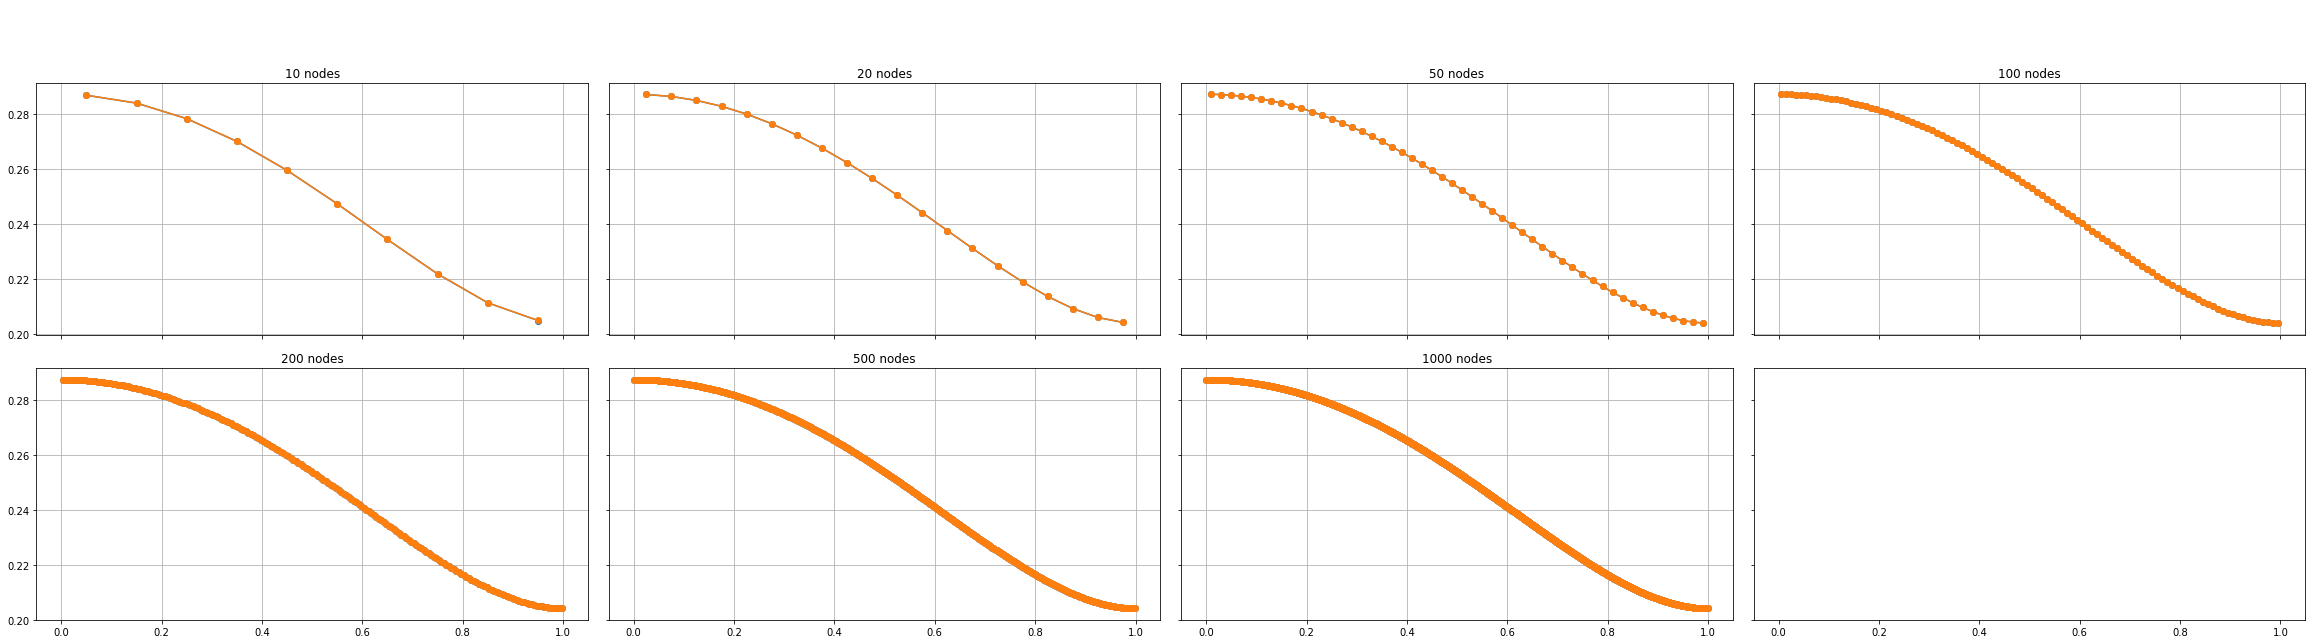

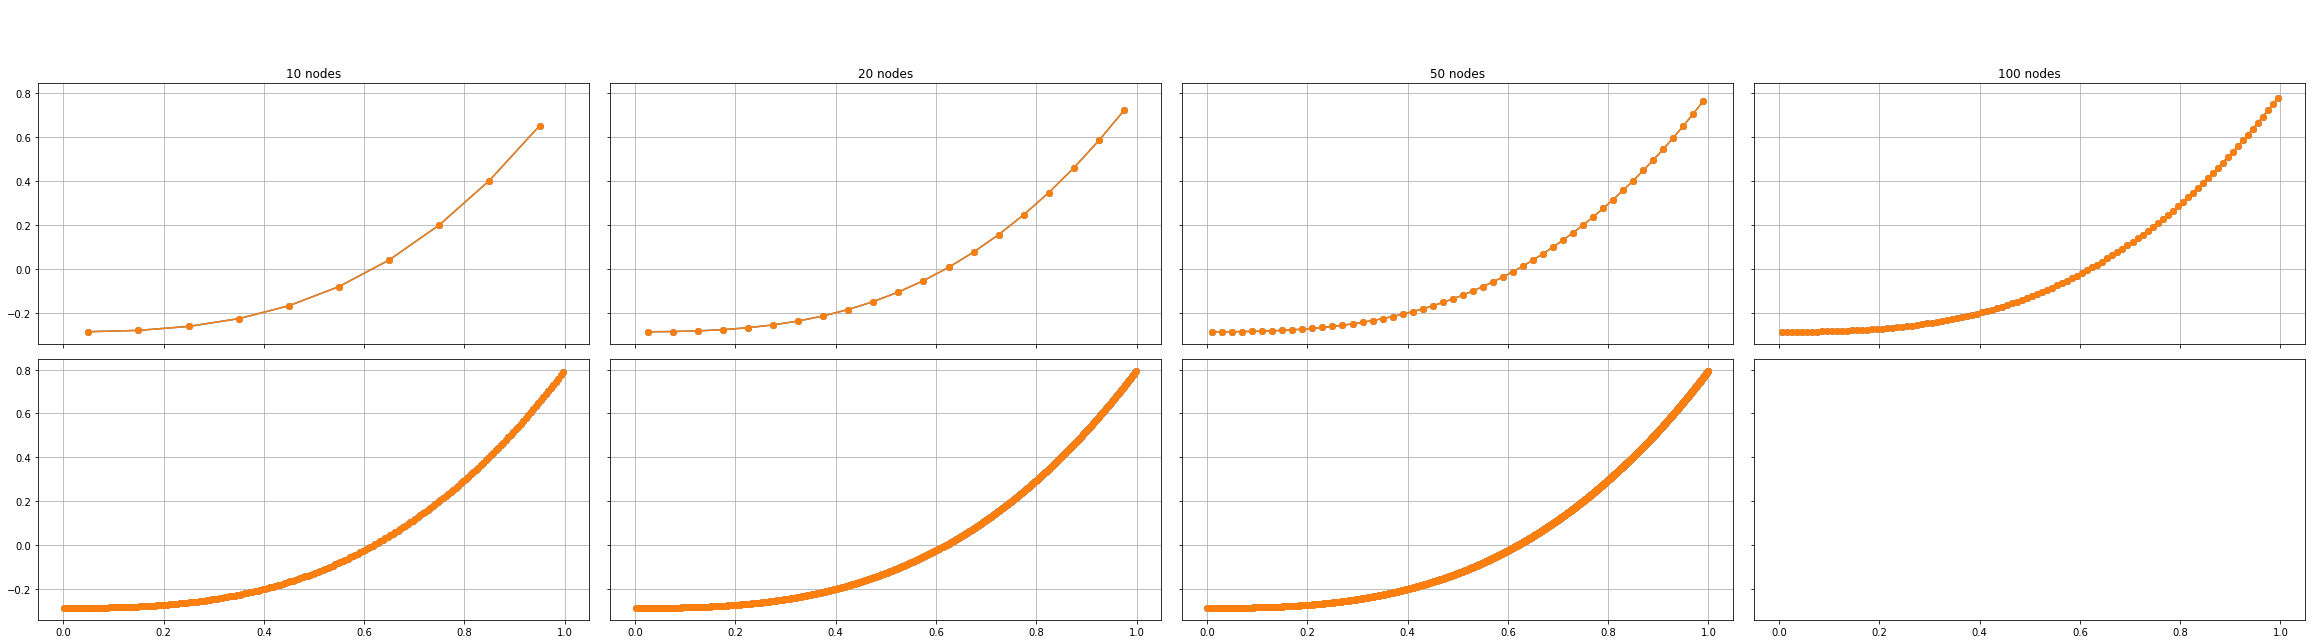

In [4]:
n_vals = [10,20,50,100,200,500,1000]
errors_y = []
errors_0_y = []
errors_1_y = []
errors_0_ydd = []
errors_1_ydd = []
errors_ydd = []

fig_1,ax_1 = plt.subplots(2,4,constrained_layout=True,
                        sharex=True, sharey=True) #for plotting y
fig_2,ax_2 = plt.subplots(2,4,constrained_layout=True,
                        sharex=True, sharey=True) # for plotting y_dd

k=-1
for n in n_vals:
    k += 1
    if(k<4):
        ax_1[0,k].plot(y_actual(n)[2],y_actual(n)[0],'o-')
        ax_1[0,k].plot(y_pade(n)[2],y_pade(n)[0],'o-')
        ax_1[0,k].grid()
        ax_1[0,k].set_title(str(n)+" nodes")
        ax_2[0,k].plot(y_actual(n)[2],y_actual(n)[1],'o-')
        ax_2[0,k].plot(y_pade(n)[2],y_pade(n)[1],'o-')
        ax_2[0,k].grid()
        ax_2[0,k].set_title(str(n)+" nodes")
    else:
        ax_1[1,k%4].plot(y_actual(n)[2],y_actual(n)[0],'o-')
        ax_1[1,k%4].plot(y_pade(n)[2],y_pade(n)[0],'o-')
        ax_1[1,k%4].grid()
        ax_1[1,k%4].set_title(str(n)+" nodes")
        ax_2[1,k%4].plot(y_actual(n)[2],y_actual(n)[1],'o-')
        ax_2[1,k%4].plot(y_pade(n)[2],y_pade(n)[1],'o-')
        ax_2[1,k%4].grid()
        ax_1[1,k%4].set_title(str(n)+" nodes")
        
    errors_y.append(np.max(np.abs(y_pade(n)[0][1:-1] - y_actual(n)[0][1:-1])))
    errors_ydd.append(np.max(np.abs(y_pade(n)[1][1:-1] - y_actual(n)[1][1:-1])))
    errors_0_y.append(np.abs(y_pade(n)[0][0] - y_actual(n)[0][0]))
    errors_1_y.append(np.abs(y_pade(n)[0][-1] - y_actual(n)[0][-1]))
    errors_0_ydd.append(np.abs(y_pade(n)[1][0] - y_actual(n)[1][0]))
    errors_1_ydd.append(np.abs(y_pade(n)[1][-1] - y_actual(n)[1][-1]))
    

fig_2.set_figwidth(32)
fig_2.set_figheight(8)
fig_2.suptitle("Double derivative computed numerically and analytically",x = 0.5,y=1.1,color = "white")
fig_2.show()

fig_1.set_figwidth(32)
fig_1.set_figheight(8)
fig_1.suptitle("The solution computed numerically and analytically",x = 0.5,y=1.1,color = "white")
fig_1.show()



C:\Users\ABHISHEK\anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\ABHISHEK\anaconda3\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\ABHISHEK\anaconda3\lib\site-packages\ipykernel_launcher.py:77: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


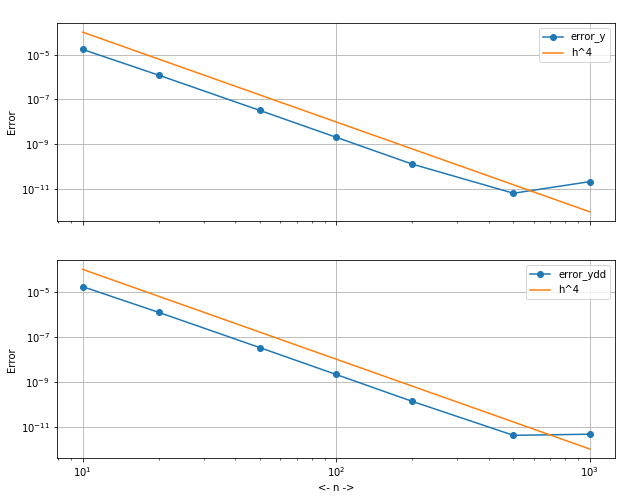

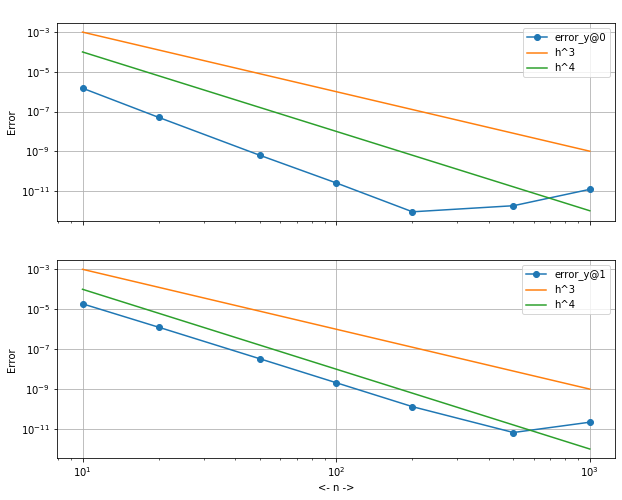

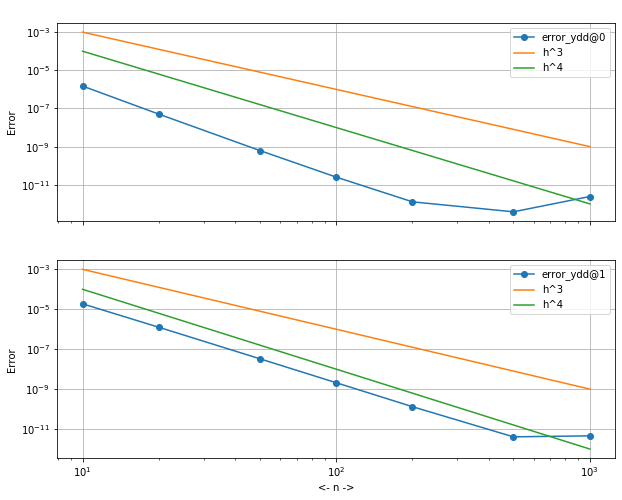

In [5]:
'''
plt.loglog()
errors_y = []
errors_0_y = []
errors_1_y = []
errors_0_ydd = []
errors_1_ydd = []
errors_ydd = []
'''
h_vals = 1/np.asarray(n_vals)

fig, (ax1,ax2) =plt.subplots(2,sharex = True)
        
ax1.loglog(n_vals,errors_y,'o-',label = 'error_y')
ax1.loglog(n_vals,np.asarray(h_vals)**4,label = "h^4")
ax1.set_title("Loglog plot of error in y",color = "white")
ax1.grid(True)
ax1.legend()
ax1.set_ylabel("Error")
        
ax2.loglog(n_vals,errors_ydd,'o-',label = 'error_ydd')
ax2.loglog(n_vals,np.asarray(h_vals)**4,label = "h^4")
ax2.set_title("Loglog plot of error in ydd",color = "white")
ax2.grid(True)
ax2.legend()
ax2.set_ylabel("Error")
ax2.set_xlabel("<- n ->")
        
fig.set_figwidth(10)
fig.set_figheight(8)
fig.show()

fig, (ax1,ax2) =plt.subplots(2,sharex = True)
        
ax1.loglog(n_vals,errors_0_y,'o-',label = 'error_y@0')
ax1.loglog(n_vals,np.asarray(h_vals)**3,label = "h^3")
ax1.loglog(n_vals,np.asarray(h_vals)**4,label = "h^4")
ax1.set_title("Loglog plot of error in y at 0",color = "white")
ax1.grid(True)
ax1.legend()
ax1.set_ylabel("Error")
        
ax2.loglog(n_vals,errors_1_y,'o-',label = 'error_y@1')
ax2.loglog(n_vals,np.asarray(h_vals)**3,label = "h^3")
ax2.loglog(n_vals,np.asarray(h_vals)**4,label = "h^4")
ax2.set_title("Loglog plot of error in y at 1",color = "white")
ax2.grid(True)
ax2.legend()
ax2.set_ylabel("Error")
ax2.set_xlabel("<- n ->")
        
fig.set_figwidth(10)
fig.set_figheight(8)
fig.show()

fig, (ax1,ax2) =plt.subplots(2,sharex = True)
        
ax1.loglog(n_vals,errors_0_ydd,'o-',label = 'error_ydd@0')
ax1.loglog(n_vals,np.asarray(h_vals)**3,label = "h^3")
ax1.loglog(n_vals,np.asarray(h_vals)**4,label = "h^4")
ax1.set_title("Loglog plot of error in ydd at 0",color = "white")
ax1.grid(True)
ax1.legend()
ax1.set_ylabel("Error")
        
ax2.loglog(n_vals,errors_1_ydd,'o-',label = 'error_ydd@1')
ax2.loglog(n_vals,np.asarray(h_vals)**3,label = "h^3")
ax2.loglog(n_vals,np.asarray(h_vals)**4,label = "h^4")
ax2.set_title("Loglog plot of error in ydd at 1",color = "white")
ax2.grid(True)
ax2.legend()
ax2.set_ylabel("Error")
ax2.set_xlabel("<- n ->")
        
fig.set_figwidth(10)
fig.set_figheight(8)
fig.show()
